# Pump it Up: Data Mining the Water Table

On [drivendata.org](https://www.drivendata.org/), you will find a wealth of opportunities to do data science for social good.  It is a site that crowdsources the world's biggest social challenges through online competitions.  I decided to give the [*Pump it Up: Data Mining the Water Table*](https://www.drivendata.org/competitions/7/page/23/) challenge a try.  In this article, I will walk you through how approached the problem.    

## The problem

To improve maintenance operations and ensure that clean, potable water is available to communities in Tanzania.  

## Approach

I used machine learning algorithms to predict the operating condition of water pumps in Tanzania.  Then submitted these predictions to [drivendata](https://www.drivendata.org/).

## The Data

The data is supplied by [Taarifa](http://taarifa.org/) and the [Tanzanian Ministry of Water](http://maji.go.tz/),   

You can download the data on the challenge's [data](https://www.drivendata.org/competitions/7/data/) link.  There are 4 files available:

* Training set values - The independent variables for the training set
* Training set labels - The dependent variables for each row in the training set values
* Test set values - The independent variables that need predictions
* Submission format - The format for submitting predictions

I previewed each file to see what they contain.

In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200

# Raw data directory
data_raw = "../data/raw/"

# read sample submissions file
sample_submissions = pd.read_csv(data_raw + "SubmissionFormat.csv")
print(sample_submissions.head())

      id     status_group
0  50785  predicted label
1  51630  predicted label
2  17168  predicted label
3  45559  predicted label
4  49871  predicted label


### Sample of training set values

In [181]:
# read training set
train_values = pd.read_csv(data_raw + "train.csv")
print("Training set contains {} rows and {} columns \n".format(train_values.shape[0], train_values.shape[1]))
train_values.head()

Training set contains 59400 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Sample of the training set labels

In [182]:
# read labels
target = pd.read_csv(data_raw + "train_labels.csv")
print("Target set contains {} rows and {} columns \n".format(target.shape[0], target.shape[1]))
target.head()

Target set contains 59400 rows and 2 columns 



,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### Sample of test set

In [183]:
# read test set
test = pd.read_csv(data_raw + "test.csv")
print("Test set contains {} rows and {} columns \n".format(test.shape[0], test.shape[1]))
test.head()

Test set contains 14850 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


The train and test files were merged to make it easier to analyze all the data.  The training labels were also added to the train dataframe.

In [184]:
train = train_values.copy()

# add target to training set
train['status_group'] = target['status_group']

In [185]:
# merge independent variables from train and test sets
frames = [train, test]
data = pd.concat(frames)
print("Merged data set contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

Merged data set contains 74250 rows and 41 columns


A graph showing the distribution of the label column

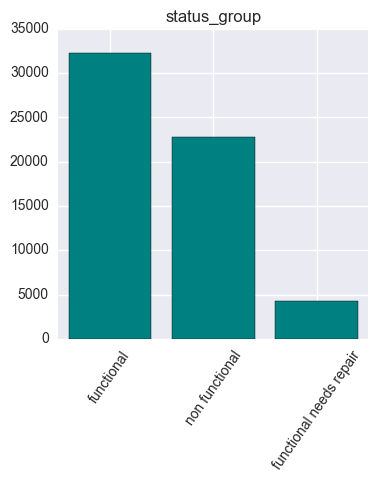

In [186]:
def plot_bar(df, column, title, figsize, colors, normalize, xticks_rotation, save_path = None):
    values = df[column].value_counts(normalize = normalize)[:30]
    names = values.index
    fig, ax = plt.subplots(figsize = figsize)
    
    colors = colors
    plt.bar(np.arange(len(values)), values, color = colors, align = 'center')
    plt.xticks(range(len(names)), names, rotation = xticks_rotation)
    plt.title(title)

    if save_path:
        plt.savefig(save_path)
    plt.show()
    
plot_bar(df = train, 
         column = 'status_group', 
         title = 'status_group', 
         colors = ['teal'], 
         figsize = (4,4), 
         normalize = False,
         xticks_rotation = 55,
         save_path = '../reports/figures/status_group')

### List of features

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

After scanning this list, I noticed that a few features have the same descriptions.  So I explored the following sets of columns that were similar.

First, I compared the extraction_type, extraction_type_group and extraction_type_class columns.

In [88]:
def plot_horizontal_bar(df, column, title, figsize, colors, normalize, yticks_rotation, save_path = None):
    values = df[column].value_counts(normalize = normalize)[:30]
    names = values.index
    fig, ax = plt.subplots(figsize = figsize)
    ax.invert_yaxis()
    colors = colors
    plt.barh(bottom = np.arange(len(values)), width = values, color = colors)
    plt.yticks(range(len(names)), names, rotation = yticks_rotation)
    plt.title(title)

    if save_path:
        plt.savefig(save_path)
    plt.show()

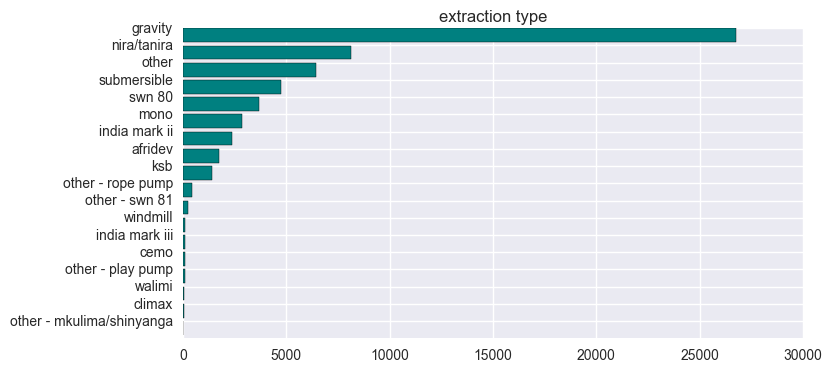

In [89]:
plot_horizontal_bar(df = train, 
                     column = 'extraction_type', 
                     title = 'extraction type', 
                     colors = ['teal'], 
                     figsize = (8,4), 
                     normalize = False,
                     yticks_rotation = 0,
                     save_path = None)

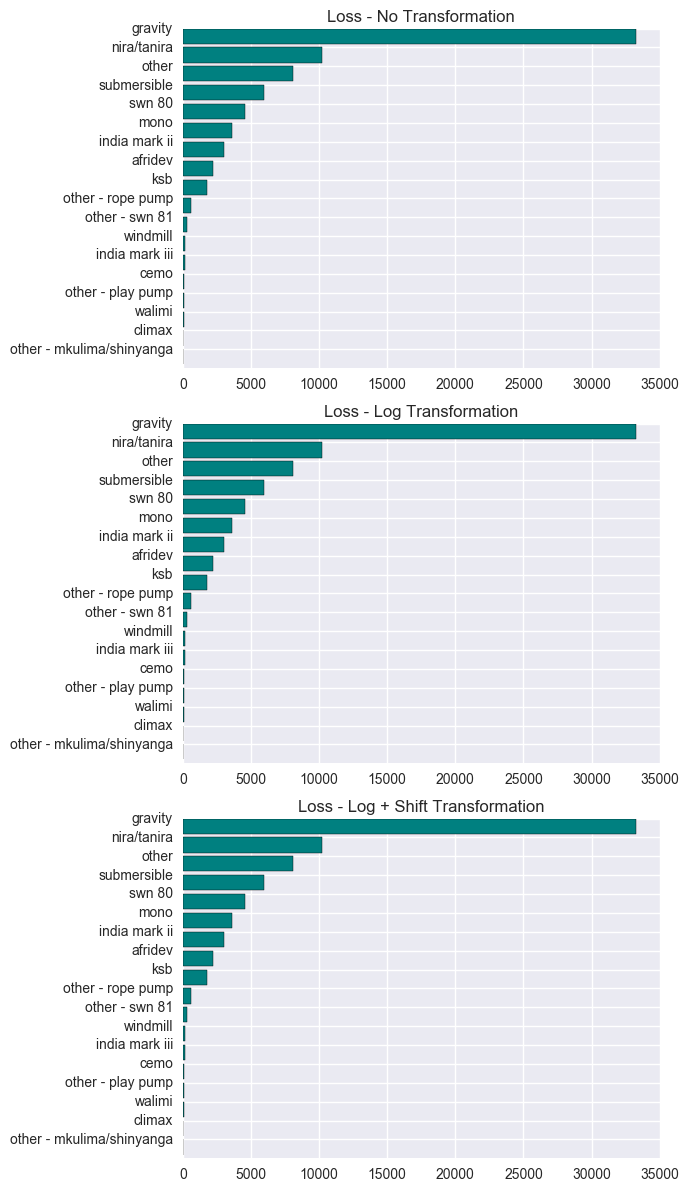

In [222]:
values = data['extraction_type'].value_counts(normalize = False)[:30]
names = values.index

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(7,12)
ax1.barh(bottom = np.arange(len(values)), tick_label = names, width = values, align = 'edge', color = ['teal'])
ax1.set_title('Loss - No Transformation')
ax1.invert_yaxis()

ax2.set_title('Loss - Log Transformation')
ax2.barh(bottom = np.arange(len(values)), tick_label = names, width = values, align = 'edge', color = ['teal'])
ax2.invert_yaxis()

ax3.set_title('Loss - Log + Shift Transformation')
ax3.barh(bottom = np.arange(len(values)), tick_label = names,width = values, align = 'edge', color = ['teal'])
ax3.invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
plot_bar(df = data, column = 'funder', title = 'Top 30 Well Funders', figsize = (10, 4), save_path = '../reports/figures/top_30_well_funders')
data['funder'].describe()

From the column comparisons, we see that `quantity` and `quantity_group` are identical.  Hence, we can get rid of one and keep the other.

## Missing Values

Several columns contain missing values.  I'll inspect each of these columns to see how best to approach this problem.

In [42]:
data.isnull().sum()

amount_tsh                   0
basin                        0
construction_year            0
date_recorded                0
district_code                0
extraction_type              0
extraction_type_class        0
extraction_type_group        0
funder                    4504
gps_height                   0
id                           0
installer                 4532
latitude                     0
lga                          0
longitude                    0
management                   0
management_group             0
num_private                  0
payment                      0
payment_type                 0
permit                    3793
population                   0
public_meeting            4155
quality_group                0
quantity                     0
quantity_group               0
recorded_by                  0
region                       0
region_code                  0
scheme_management         4846
scheme_name              35258
source                       0
source_c

Although the government of Tanzania provides most of the funding for the wells, other organizations fund approximately 75% of the total number of wells.  We could assign the missing values in this column to an `other` group.  

There are 2140 unique values in the `funder` column.  We could combine or bin values based the frequency distribution of this column.

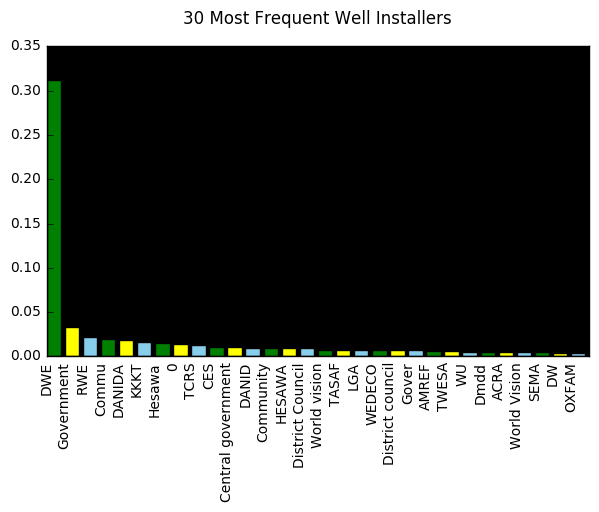

count     69718
unique     2410
top         DWE
freq      21751
Name: installer, dtype: object

In [45]:
plot_bar(df = data, column = 'installer', title = '30 Most Frequent Well Installers', figsize = (7, 4), save_path = '../reports/figures/top_30_well_installers')
data['installer'].describe()

Since DWE accounts for approximately 30% of wells installed, we can't assume they installed other wells.  We could assign missing values in this column to an `other` category.

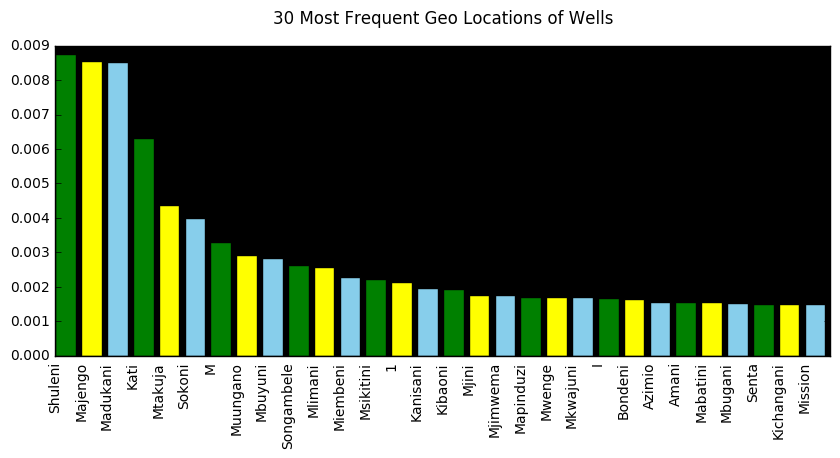

count       73780
unique      21425
top       Shuleni
freq          646
Name: subvillage, dtype: object

In [46]:
plot_bar(df = data, column = 'subvillage', title = '30 Most Frequent Geo Locations of Wells', figsize = (10, 4), save_path = '../reports/figures/top_30_geo_locations')
data['subvillage'].describe()

We could assign missing values in this column to an `other` category.  

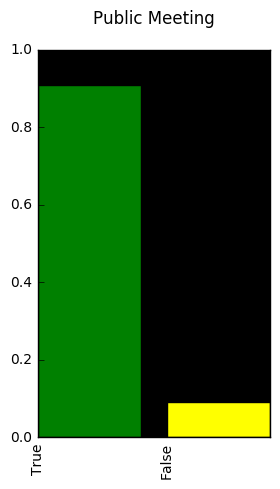

In [47]:
plot_bar(df = data, column = 'public_meeting', title = 'Public Meeting', figsize = (3, 5), save_path = '../reports/figures/public_meeting')

Most values in this column are labeled as true.  I think it's safe to assign the missing values to this column.  

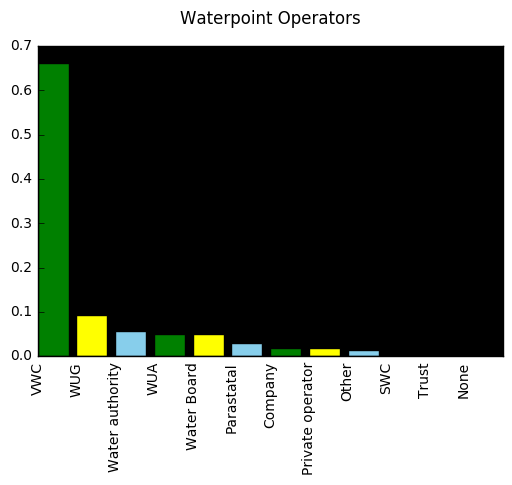

count     69404
unique       12
top         VWC
freq      45917
Name: scheme_management, dtype: object

In [48]:
plot_bar(df = data, column = 'scheme_management', title = 'Waterpoint Operators', figsize = (6, 4), save_path = '../reports/figures/waterpoint_operators')
data['scheme_management'].describe()

The `scheme_management` colum has 12 unique values.  We could perform one-hot encoding to convert the values into numericals.  

We could assign the missing values to VWC because they operate most waterpoints.  

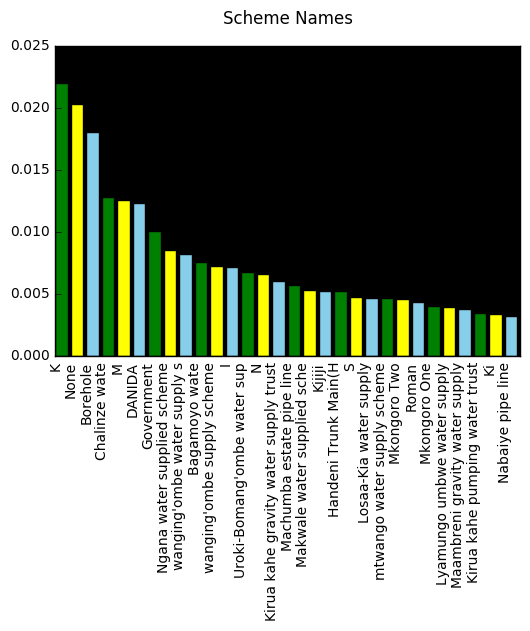

count     38992
unique     2868
top           K
freq        858
Name: scheme_name, dtype: object

In [49]:
plot_bar(df = data, column = 'scheme_name', title = 'Scheme Names', figsize = (6, 4), save_path = '../reports/figures/scheme_names')  
data['scheme_name'].describe()

We see some odd names, like 'K', 'M', 'I'.  Since I'm not sure how to interpret this, I'll go ahead and assign the missing values to a new group

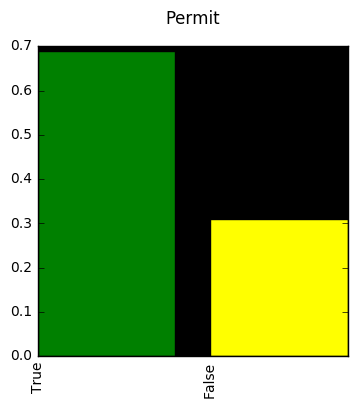

In [50]:
plot_bar(df = data, column = 'permit', title = 'Permit', figsize = (4, 4), save_path = '../reports/figures/permit')

Since most wells are permitted, let's replace missing values in the `permit` column with `True`

### Does altitude affect water supply?

Let's plot the `amount_tsh` against the `gps_height` column to find out.

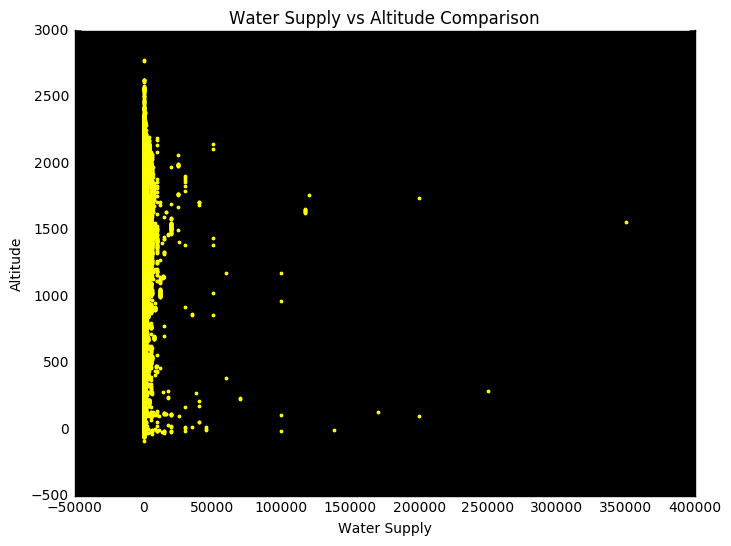

In [17]:
def plot_scatter(var1, var2, color, s, xlabel, ylabel, title, save_path):
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.set_axis_bgcolor('black')
    plt.scatter(var1, var2, color = color, s = s)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.savefig(save_path)
    plt.show()
    
plot_scatter(data['amount_tsh'], data['gps_height'], color = 'yellow', s = 3, xlabel = 'Water Supply', ylabel = 'Altitude', title = 'Water Supply vs Altitude Comparison', save_path = '../reports/figures/water-supply-vs-altitude')

There doesn't seem to be any correlation between altitude and water supply.  It is evident that a few wells are pumping far more water than others.  It would be interesting to see what factors influence this.  I filtered the data for the waterpoints that supplied excessive amounts of water.

### Is there any connection between population and water supply?

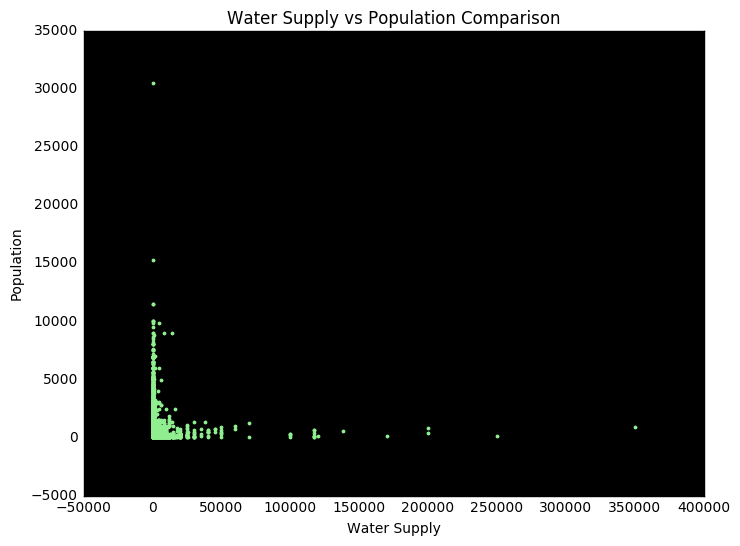

In [19]:
plot_scatter(data['amount_tsh'], data['population'], color = 'lightgreen', s = 3, xlabel = 'Water Supply', ylabel = 'Population', title = 'Water Supply vs Population Comparison', save_path = '../reports/figures/water-supply-vs-population')

There isn't any direct correlation between population and water supply

### Does population size diminish as altitude of wells increase?

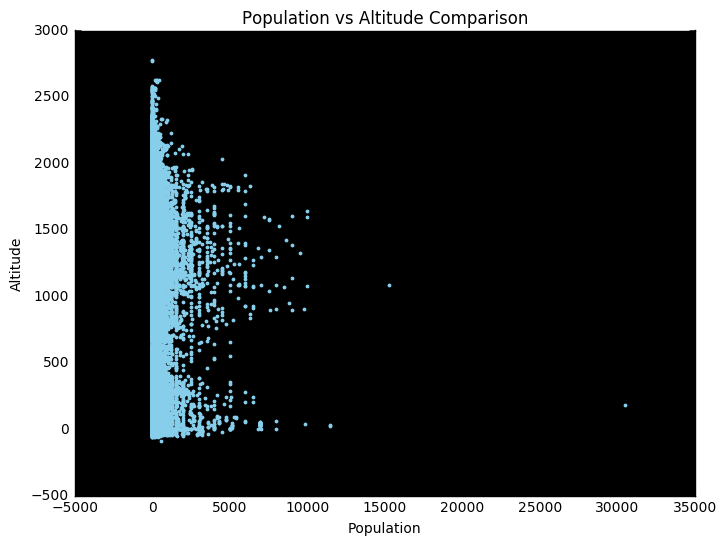

In [20]:
plot_scatter(data['population'], data['gps_height'], color = 'skyblue', s = 3, xlabel = 'Population', ylabel = 'Altitude', title = 'Population vs Altitude Comparison', save_path = '../reports/figures/population-vs-altitude')

There doesn't seem to be a direct link between the height of wells and population size

### Inhabited areas with/without water

In [13]:
no_water = data[data.amount_tsh == 0.0]
print(no_water.shape[0])

52049


There is an astounding number of wells without any water.  I won't look into seeing how many of these wells are functional, given that I don't have the status of wells in the test data.  Instead, I will create a few new features with this information.  For example, we could look to see whether people live around wells without water. 

In [16]:
# populated areas without water
cols = ['amount_tsh', 'population']
filtered_data = data[cols]
no_water = filtered_data[(filtered_data.population > 0.0) & (filtered_data.amount_tsh == 0.0)]
print(no_water.shape[0])
no_water.head()

26500


,amount_tsh,population
1,0.0,280
3,0.0,58
10,0.0,345
13,0.0,1
15,0.0,200


This is also alarming.  There are 26,500 wells containing no water, but there are people living around these areas.  

## Explore Target Label

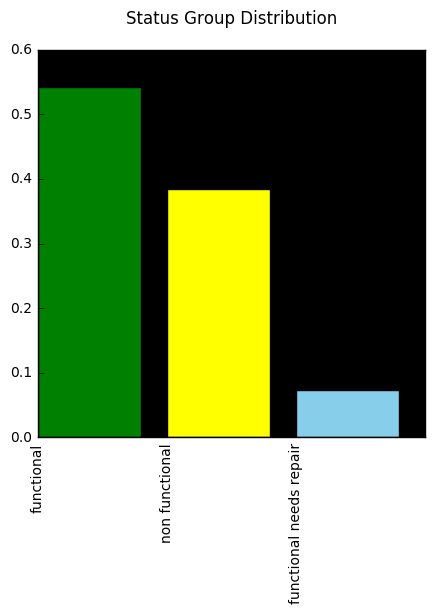

In [51]:
plot_bar(df = train, column = 'status_group', title = 'Status Group Distribution', figsize = (5, 5), save_path = '../reports/figures/target_dist')

We can see that our target column is balanced.  The `functional` class accounts for approximately 54% of samples, while the `functional needs repair` accounts for under 10% of samples.  

## How to handle independent variables

### Continuous Variables

In [19]:
# amount_tsh column
data['amount_tsh'].describe()

count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

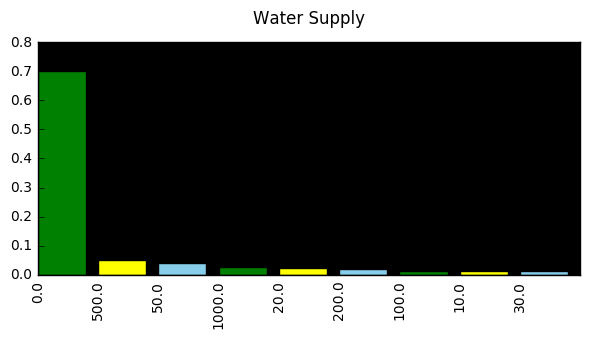

In [26]:
plot_bar(df = data, column = 'amount_tsh', title = 'Water Supply', figsize = (7, 3), save_path = '../reports/figures/watersupply')

In [20]:
# gps_height
data['gps_height'].describe()

count    74250.000000
mean       665.667313
std        692.761033
min        -90.000000
25%          0.000000
50%        364.000000
75%       1317.000000
max       2777.000000
Name: gps_height, dtype: float64

In [21]:
# population
data['population'].describe()

count    74250.000000
mean       180.750828
std        471.086120
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

This distribution shows that population around 36% of wells aren't populated

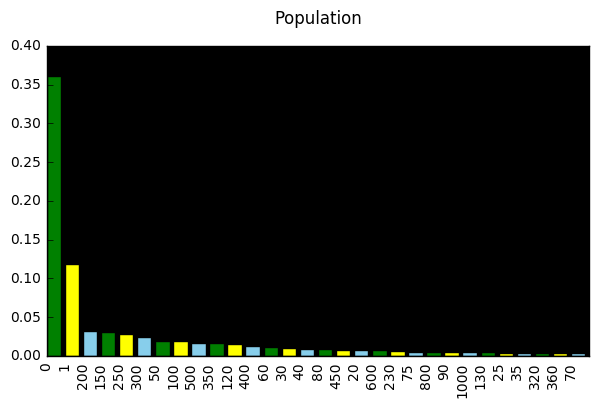

In [21]:
plot_bar(df = data, column = 'population', title = 'Population', figsize = (7, 4), save_path = '../reports/figures/population')

In [29]:
# latitude
data['latitude'].describe()

count    7.425000e+04
mean    -5.701771e+00
std      2.944969e+00
min     -1.164944e+01
25%     -8.525675e+00
50%     -5.026540e+00
75%     -3.325058e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [30]:
# longitude
data['longitude'].describe()

count    74250.000000
mean        34.074262
std          6.572519
min          0.000000
25%         33.086819
50%         34.907475
75%         37.181685
max         40.345193
Name: longitude, dtype: float64

### Categorical Variables

In [31]:
# waterpoint name - drop column 
data['wpt_name'].describe()

count     74250
unique    45684
top        none
freq       4440
Name: wpt_name, dtype: object

In [32]:
# basin - one-hot encode column
data['basin'].describe()

count             74250
unique                9
top       Lake Victoria
freq              12871
Name: basin, dtype: object

In [33]:
# region - one-hot encode column
data['region'].describe()

count      74250
unique        21
top       Iringa
freq        6599
Name: region, dtype: object

In [9]:
# region_code - perform one-hot encoding
data['region_code'].describe()

count    74250.000000
mean        15.265414
std         17.508907
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64

In [12]:
# district code - perform one-hot encoding
print(data['district_code'].describe())
print(data['district_code'].value_counts())

count    74250.000000
mean         5.629077
std          9.641636
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64
1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64


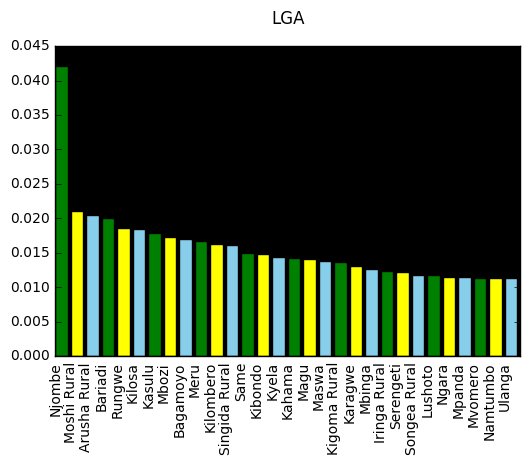

In [15]:
# lga - we could group these based on a frequency distribution
data['lga'].describe()
plot_bar(df = data, column = 'lga', title = 'LGA', figsize = (6, 4), save_path = '../reports/figures/lga')  

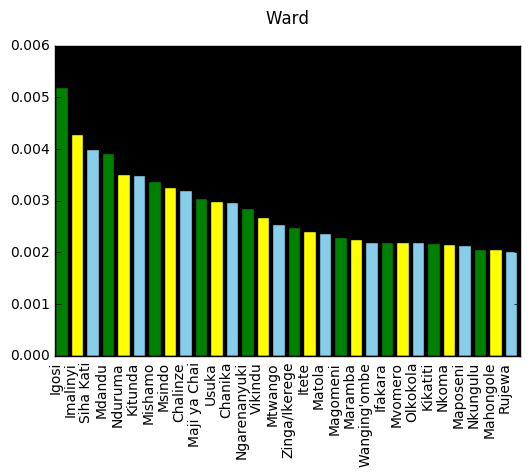

In [16]:
# ward - we could group these based on a frequency distribution
data['ward'].describe()
plot_bar(df = data, column = 'ward', title = 'Ward', figsize = (6, 4), save_path = '../reports/figures/ward')  

In [44]:
# recorded_by - remove column
data['recorded_by'].describe()

count                       74250
unique                          1
top       GeoData Consultants Ltd
freq                        74250
Name: recorded_by, dtype: object

## `construction_year`

A deeper look at the `construction_year` column shows that there are thousands of zeros instead of actual year values.  Leaving these zero values untouched would throw off the mean of the `construction_year` column.  The table below shows that the average construction year is 1298.  This is clearly innacurate.  

In [46]:
# construction year - group based on frequency distribution
data['construction_year'].describe()

count    74250.000000
mean      1298.463650
std        952.349375
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

To rectify this, I will filter the `construction_year` column for rows that contains a value greater than zero, then find the average construction year on this filtered data set.  I'll then replace the occurences of zeros in the original `construction_year` column with the average of the filtered dataframe. 

In [30]:
# get rows that contains an actual year value (value greater than zero) 
non_zero = data[data.construction_year > 0]
avg_construction_year = non_zero['construction_year'].mean()
print(round(avg_construction_year))

1997


We can see that after filtering, the average construction year is 1997--a much more realistic date than the 1298 value we calculated earlier.  

In [75]:
# extraction type - perform one-hot encoding
data['extraction_type'].describe()

count       74250
unique         18
top       gravity
freq        33263
Name: extraction_type, dtype: object

In [73]:
# extraction type group - perform one-hot encoding
data['extraction_type_group'].describe()

count       74250
unique         13
top       gravity
freq        33263
Name: extraction_type_group, dtype: object

In [49]:
# extraction type class - perform one-hot encoding
data['extraction_type_class'].describe()

count       74250
unique          7
top       gravity
freq        33263
Name: extraction_type_class, dtype: object

In [50]:
# management - perform one-hot encoding
data['management'].describe()

count     74250
unique       12
top         vwc
freq      50624
Name: management, dtype: object

In [51]:
# management group - perform one-hot encoding
data['management_group'].describe()

count          74250
unique             5
top       user-group
freq           65538
Name: management_group, dtype: object

In [27]:
# quantity - perform one-hot encoding
data['quantity'].describe()

count      74250
unique         5
top       enough
freq       41522
Name: quantity, dtype: object

### payment vs payment_type

In [69]:
# payment - perform one-hot encoding
print(data['payment'].describe())
print("\n")
print(data['payment'].value_counts())

count         74250
unique            7
top       never pay
freq          31712
Name: payment, dtype: object


never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64


In [70]:
# payment type - perform one-hot encoding
print(data['payment_type'].describe())
print("\n")
print(data['payment_type'].value_counts())

count         74250
unique            7
top       never pay
freq          31712
Name: payment_type, dtype: object


never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64


You can see that `payment_type` and `payment` are pretty much providing the same information, except that the categories are labeled differently.  For example, `pay annually` is the same thing as `annually`.  Likewise, `pay monthly` is the same as `monthly`.  We can go ahead and delete the `payment_type` column.   

In [56]:
# water quality - perform one-hot encoding
data['water_quality'].describe()

count     74250
unique        8
top        soft
freq      63505
Name: water_quality, dtype: object

In [57]:
# quality_group -perform one-hot encoding
data['quality_group'].describe()

count     74250
unique        6
top        good
freq      63505
Name: quality_group, dtype: object

### `source_type` vs `source`

In [61]:
# source - perform one-hot encoding
data['source'].describe()
print(data['source'].value_counts())

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64


In [52]:
# source_type - perform one-hot encoding
print(data['source_type'].describe())
print('\n Unique values')
print(data['source_type'].value_counts())

count      74250
unique         7
top       spring
freq       21216
Name: source_type, dtype: object

 Unique values
spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64


A closer look at the `source` and `source_type` columns show that these two columns are nearly identical.  The only difference is that `source` tells us more about the wells' water source.  For example, `source` defines whether a well gets its water from either a river or lake, while `source_type` doesn't.  In `source_type`, we see that the `river` and `lake` categories are combined.  `source` also has an `unknown` category.  This `unknown` category is bundled into `other` in the `source_type` column.  So I'll drop the `source_type` column.  

In [62]:
# source_class - perform one-hot encoding
data['source_class'].describe()
data['source_class'].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

### waterpoint_type vs waterpoint_type_group

In [65]:
# waterpoint type - perform one-hot encoding
print(data['waterpoint_type'].describe())
print("\n")
print(data['waterpoint_type'].value_counts())

count                  74250
unique                     7
top       communal standpipe
freq                   35628
Name: waterpoint_type, dtype: object


communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64


In [66]:
# waterpoint type group - perform one-hot encoding
print(data['waterpoint_type_group'].describe())
print("\n")
print(data['waterpoint_type_group'].value_counts())

count                  74250
unique                     6
top       communal standpipe
freq                   43239
Name: waterpoint_type_group, dtype: object


communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64


The `waterpoint_type` and `water_type_group` columns are similar except that `waterpoint_type` breaks down a category, `communal standpipe` into a subgroup called `communal standpipe multiple`.  I think it's safe to drop `waterpoint_type_group`, since it doesn't disclose as much information as `waterpoint_type`.

In [54]:
# Save transformed data
data.to_csv('../data/interim/transformed_data.csv', index = False)